# Taller 2 segundo corte

Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

x(0) = 1, v(0) = 0 (posición inicial igual a 1 y velocidad inicial igual a cero).

# Taller 2 Pedro Ramirez


\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

la ecuacion doferencial es de segundo porque la mayor derivada de la ecuacion es de segundo orden

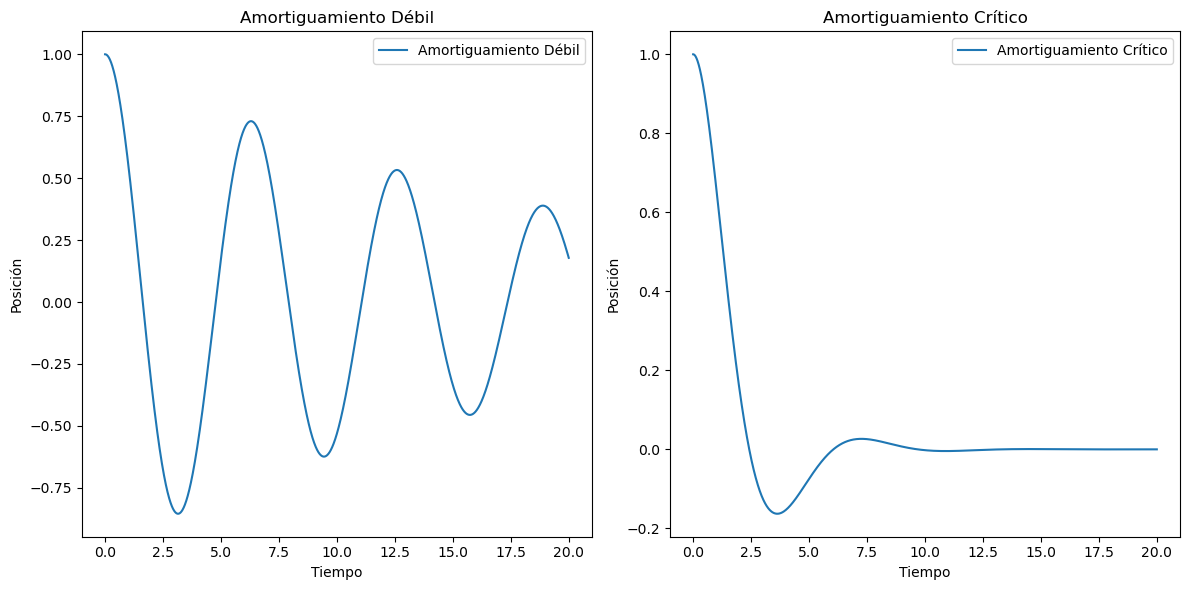

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_oscillator(x, v, y, w):
    dxdt = v
    dvdt = -y * v - w**2 * x
    return dxdt, dvdt

# Implementar el método de Runge-Kutta de cuarto orden
def runge_kutta(h, x, v, y, w):
    k1x, k1v = h * v, h * (-y * v - w**2 * x)
    k2x, k2v = h * (v + 0.5 * k1v), h * (-y * (v + 0.5 * k1v) - w**2 * (x + 0.5 * k1x))
    k3x, k3v = h * (v + 0.5 * k2v), h * (-y * (v + 0.5 * k2v) - w**2 * (x + 0.5 * k2x))
    k4x, k4v = h * (v + k3v), h * (-y * (v + k3v) -w**2 * (x + k3x))

    x_i = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    v_i = v + (k1v + 2 * k2v + 2 * k3v + k4v) / 6

    return x_i, v_i


y_debil = 0.1  
y_critico = 1.0  
w = 1.0  
x0 = 1.0
v0 = 0.0

t_max = 20.0
h = 0.01
num_ite = int(t_max / h)


t_values = np.linspace(0, t_max, num_ite)
x_db, v_db = np.zeros(num_ite), np.zeros(num_ite)
x_critico, v_critico = np.zeros(num_ite), np.zeros(num_ite)


x_db[0], v_db[0] = x0, v0
x_critico[0], v_critico[0] = x0, v0


for i in range(1, num_steps):
    x_db[i], v_db[i] = runge_kutta(h, x_db[i-1], v_db[i-1], y_debil, w)


for i in range(1, num_steps):
    x_critico[i], v_critico[i] = runge_kutta(h, x_critico[i-1], v_critico[i-1], y_critico, w)

# Graficar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, x_db, label='Amortiguamiento Débil')
plt.title('Amortiguamiento Débil')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values, x_critico, label='Amortiguamiento Crítico')
plt.title('Amortiguamiento Crítico')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

plt.tight_layout()
plt.show()